## Different binning widths k-means

In [1]:
import cluster_data
from cluster_data import run_clustering, normalize_data, unnormalize, generate_running_year_ranges, bin_data_for_clustering
import numpy as np
import pandas as pd
import os
from kmeans import k_means
from cluster_plotter import ClusterPlotter
from clustering_utils import ClusterData
import cluster_plotter
import scores

array_of_metrics = []
array_of_yearranges = []
array_of_binwidths = []

bins = [3, 4, 5, 6]
k_values = [5, 6, 7]  # Define once

# Output directory for plots
plot_dir = "Images/binning_width_kmeans_and_images"
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for b in bins:
    running_ranges = generate_running_year_ranges(2002, 2023, b)
    binned_data = bin_data_for_clustering(running_ranges, print_res=False)

    for cluster_data, year_range in binned_data:
        print(f"\nRunning K-Means for Year Range: {year_range}")

        data_array = np.array([cluster_data.inc, cluster_data.raan]).T
        normalized_data, data_min, data_max = normalize_data(data_array)

        for k in k_values:
            result_kmeans, time_kmeans, n_clusters_kmeans, points_per_cluster_kmeans, metrics_kmeans = run_clustering(
                k_means, f"K-means (k={k})", normalized_data, data_min, data_max, k, plot=False, init='kmeans++'
            )

            # Ensure metrics_kmeans has enough elements before accessing indices
            if len(metrics_kmeans) >= 7:
                rounded_cluster_std = {key: tuple(round(val, 3) for val in value) for key, value in metrics_kmeans[4].items()}
                rounded_square_density = {key: round(value, 3) for key, value in metrics_kmeans[5].items()}
                rounded_hull_density = {key: round(value, 3) for key, value in metrics_kmeans[6].items()}
            else:
                rounded_cluster_std = rounded_square_density = rounded_hull_density = None

            array_of_metrics.append(metrics_kmeans[:4])  
            array_of_yearranges.append(year_range) 
            array_of_binwidths.append(b)

            unnormalized_data, cluster_centers = unnormalize(result_kmeans.data, result_kmeans.cluster_centers, data_min, data_max)
            plotter = ClusterPlotter(unnormalized_data, result_kmeans.labels, cluster_centers)
            plotter.clusters_2d_plot(f"K-Means: years = {year_range}, k = {k}", os.path.join(plot_dir, f"kmeans_{year_range}_k{k}.png"))

dir = plot_dir
scores.plot_scores_for_different_binnings(array_of_metrics, array_of_yearranges, array_of_binwidths, dir)


KeyboardInterrupt: 

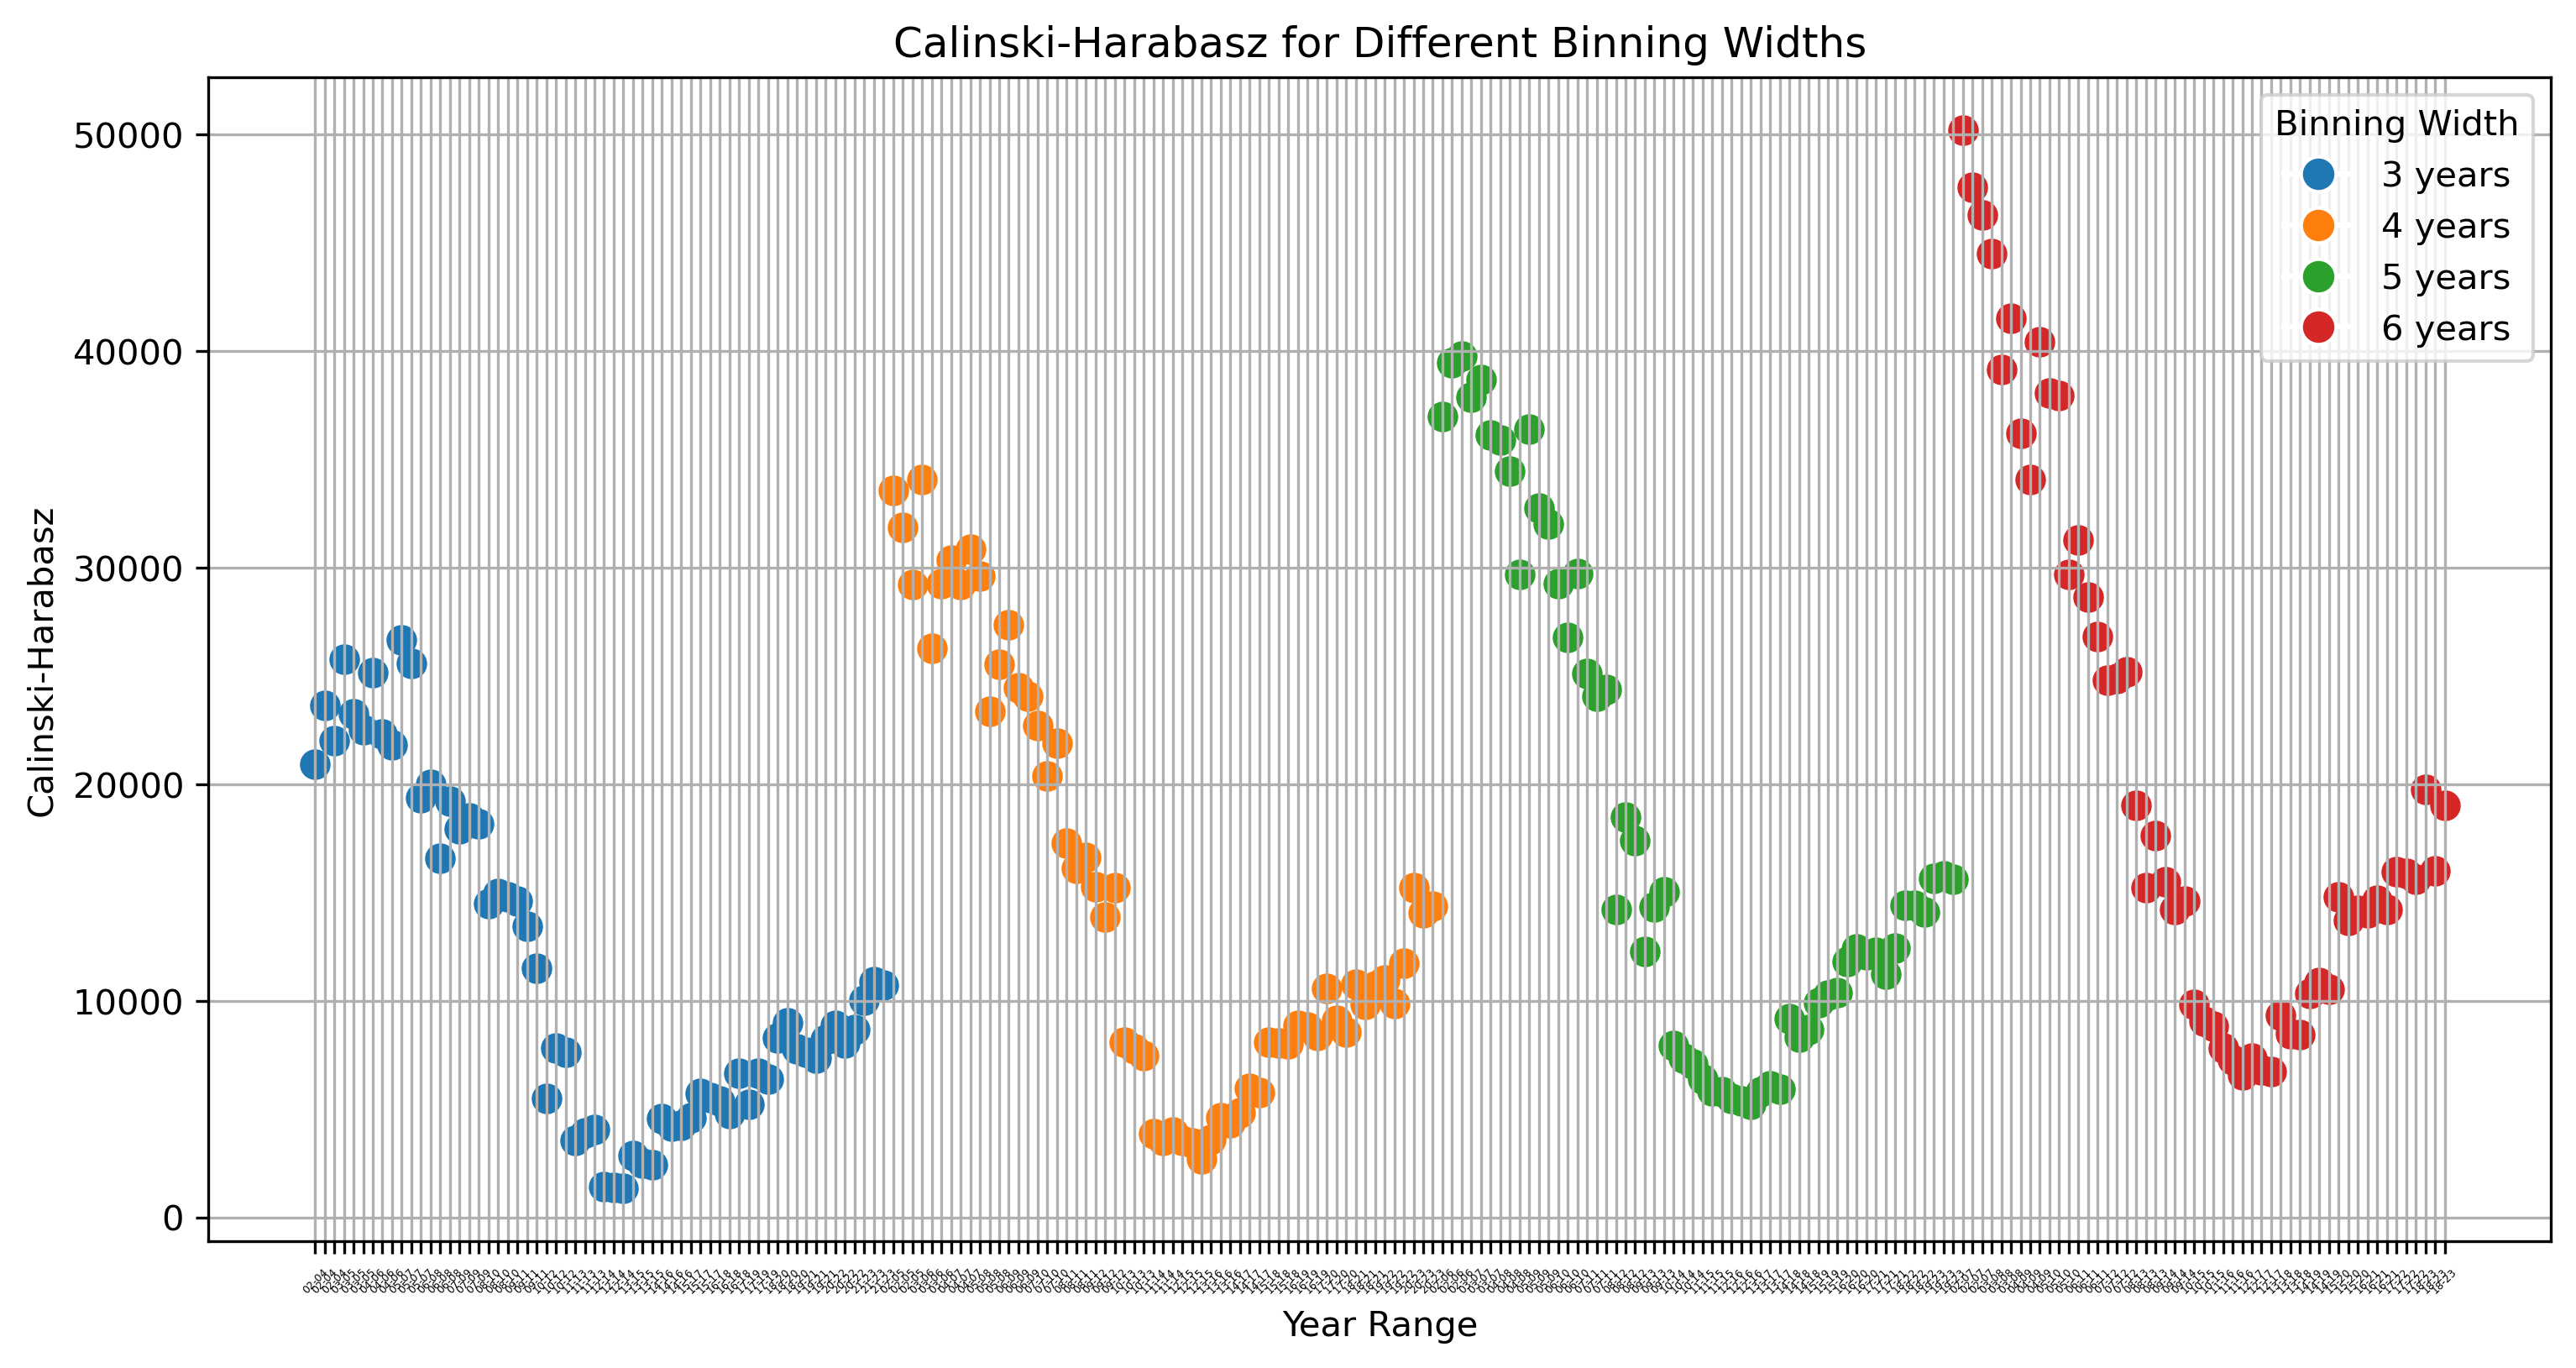

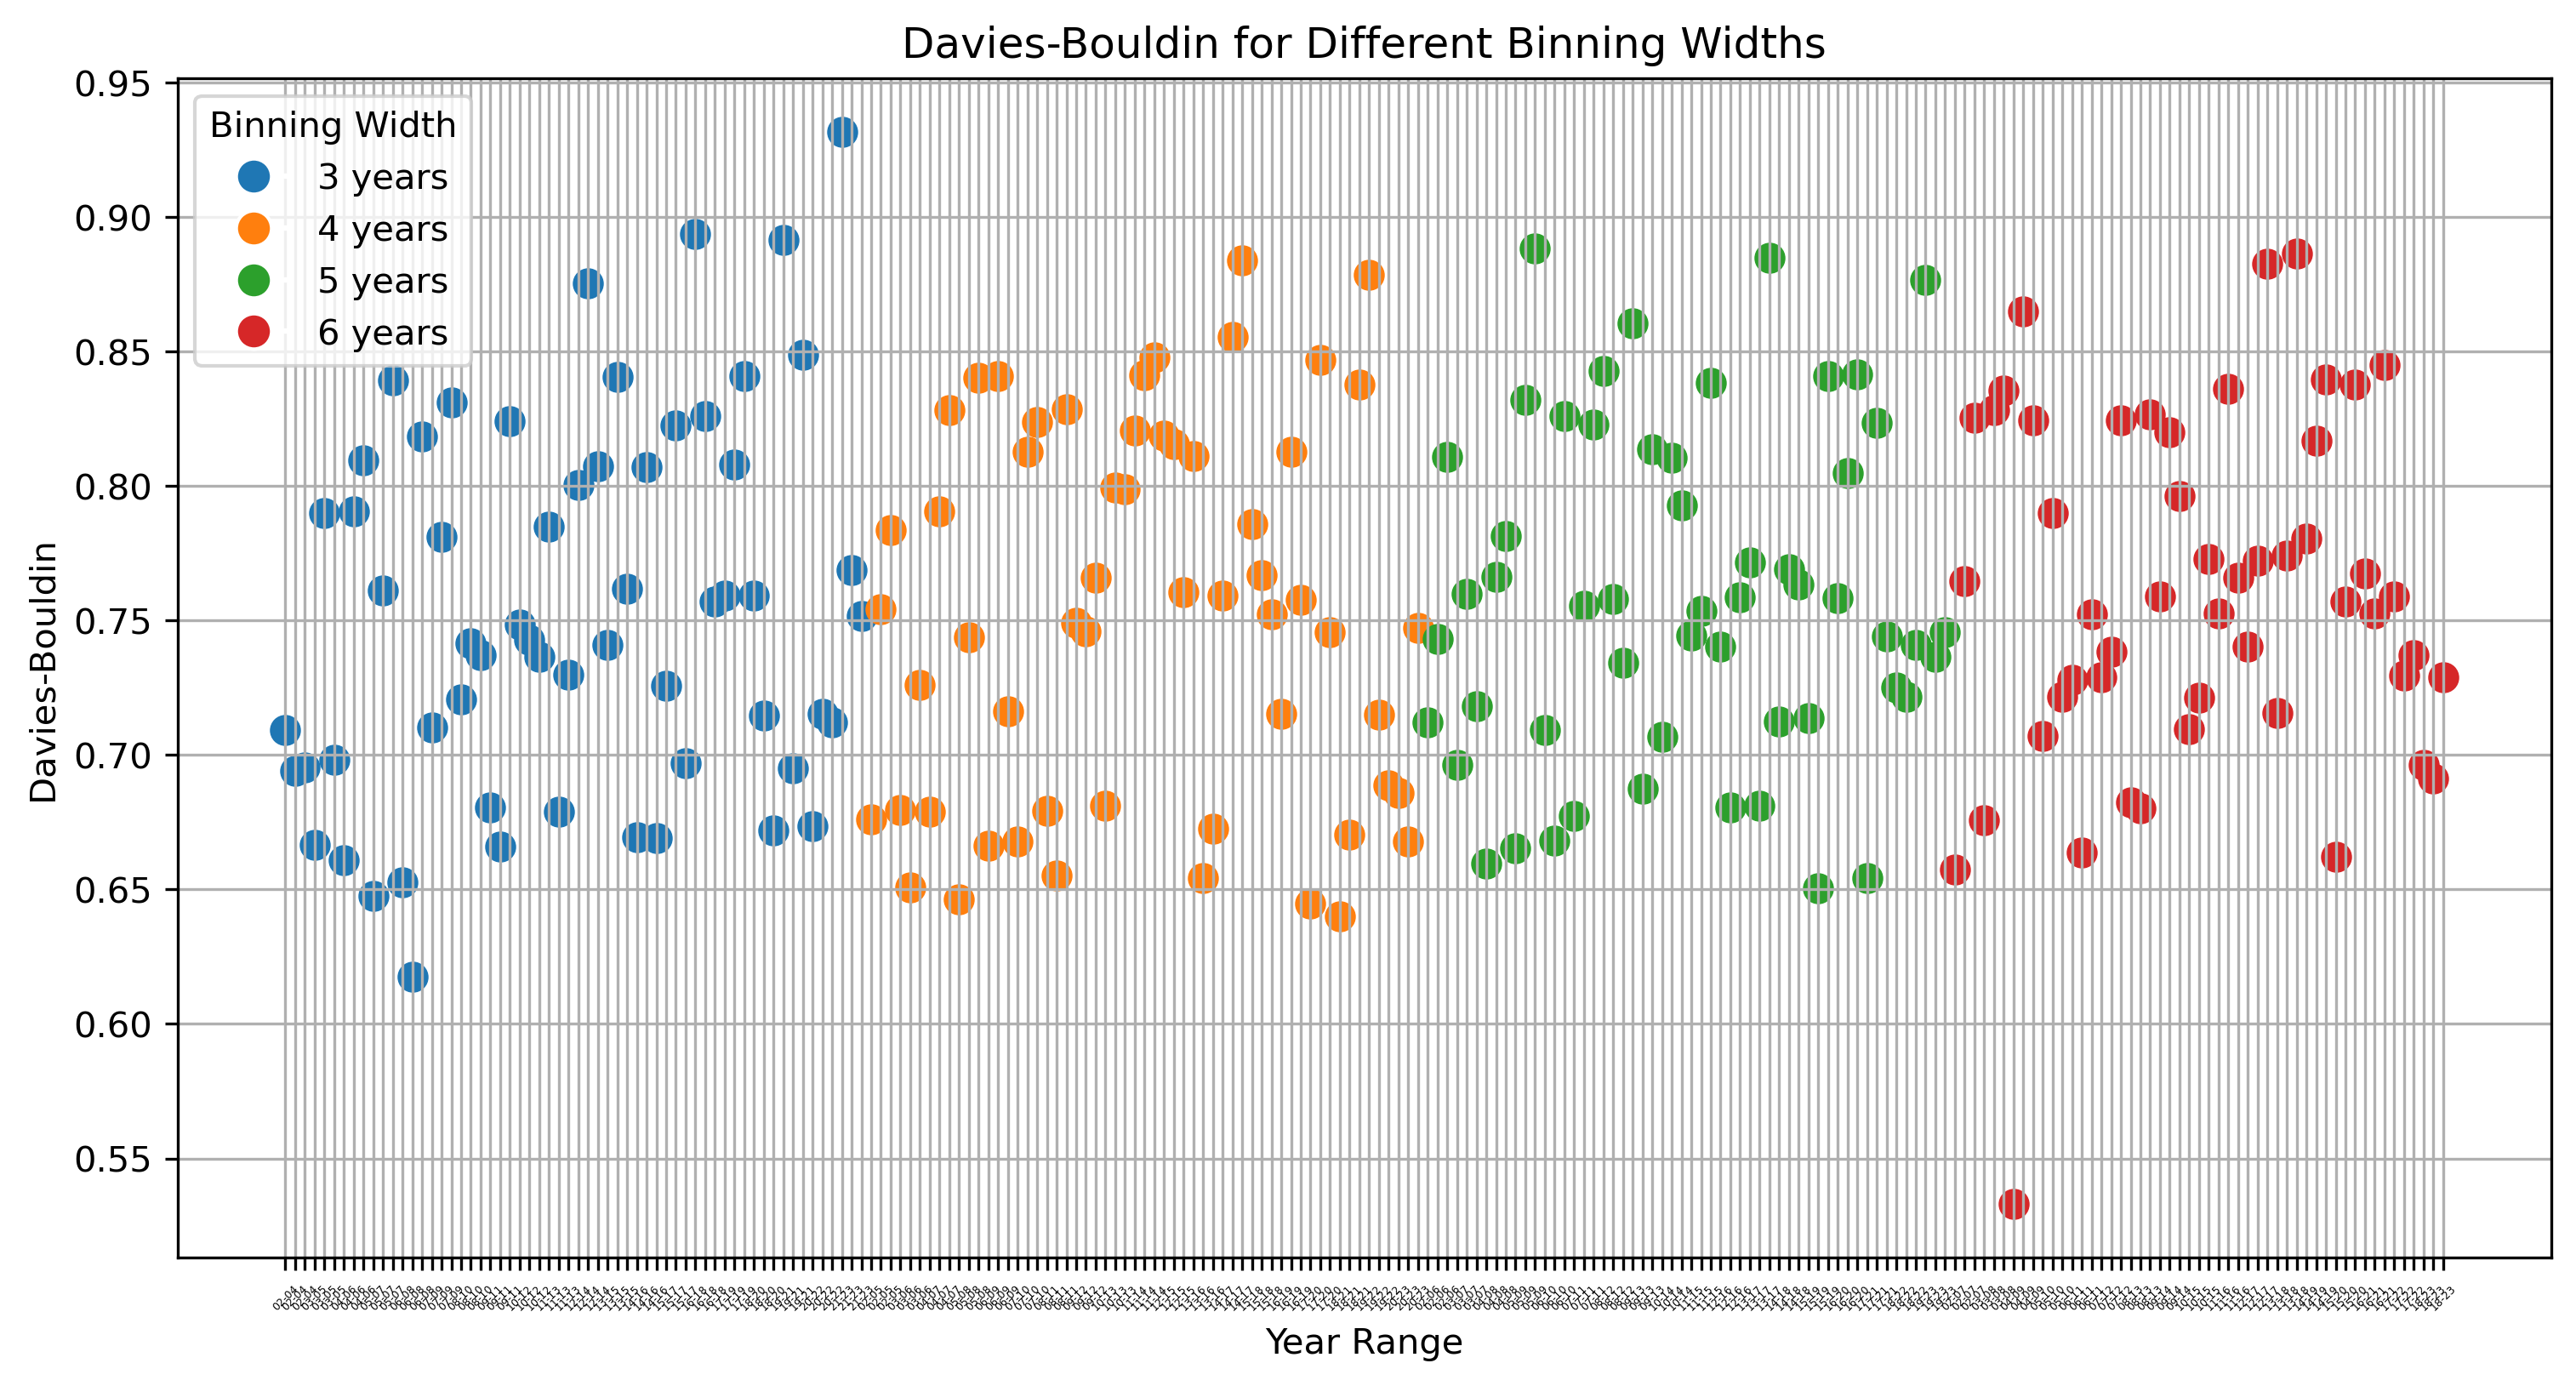

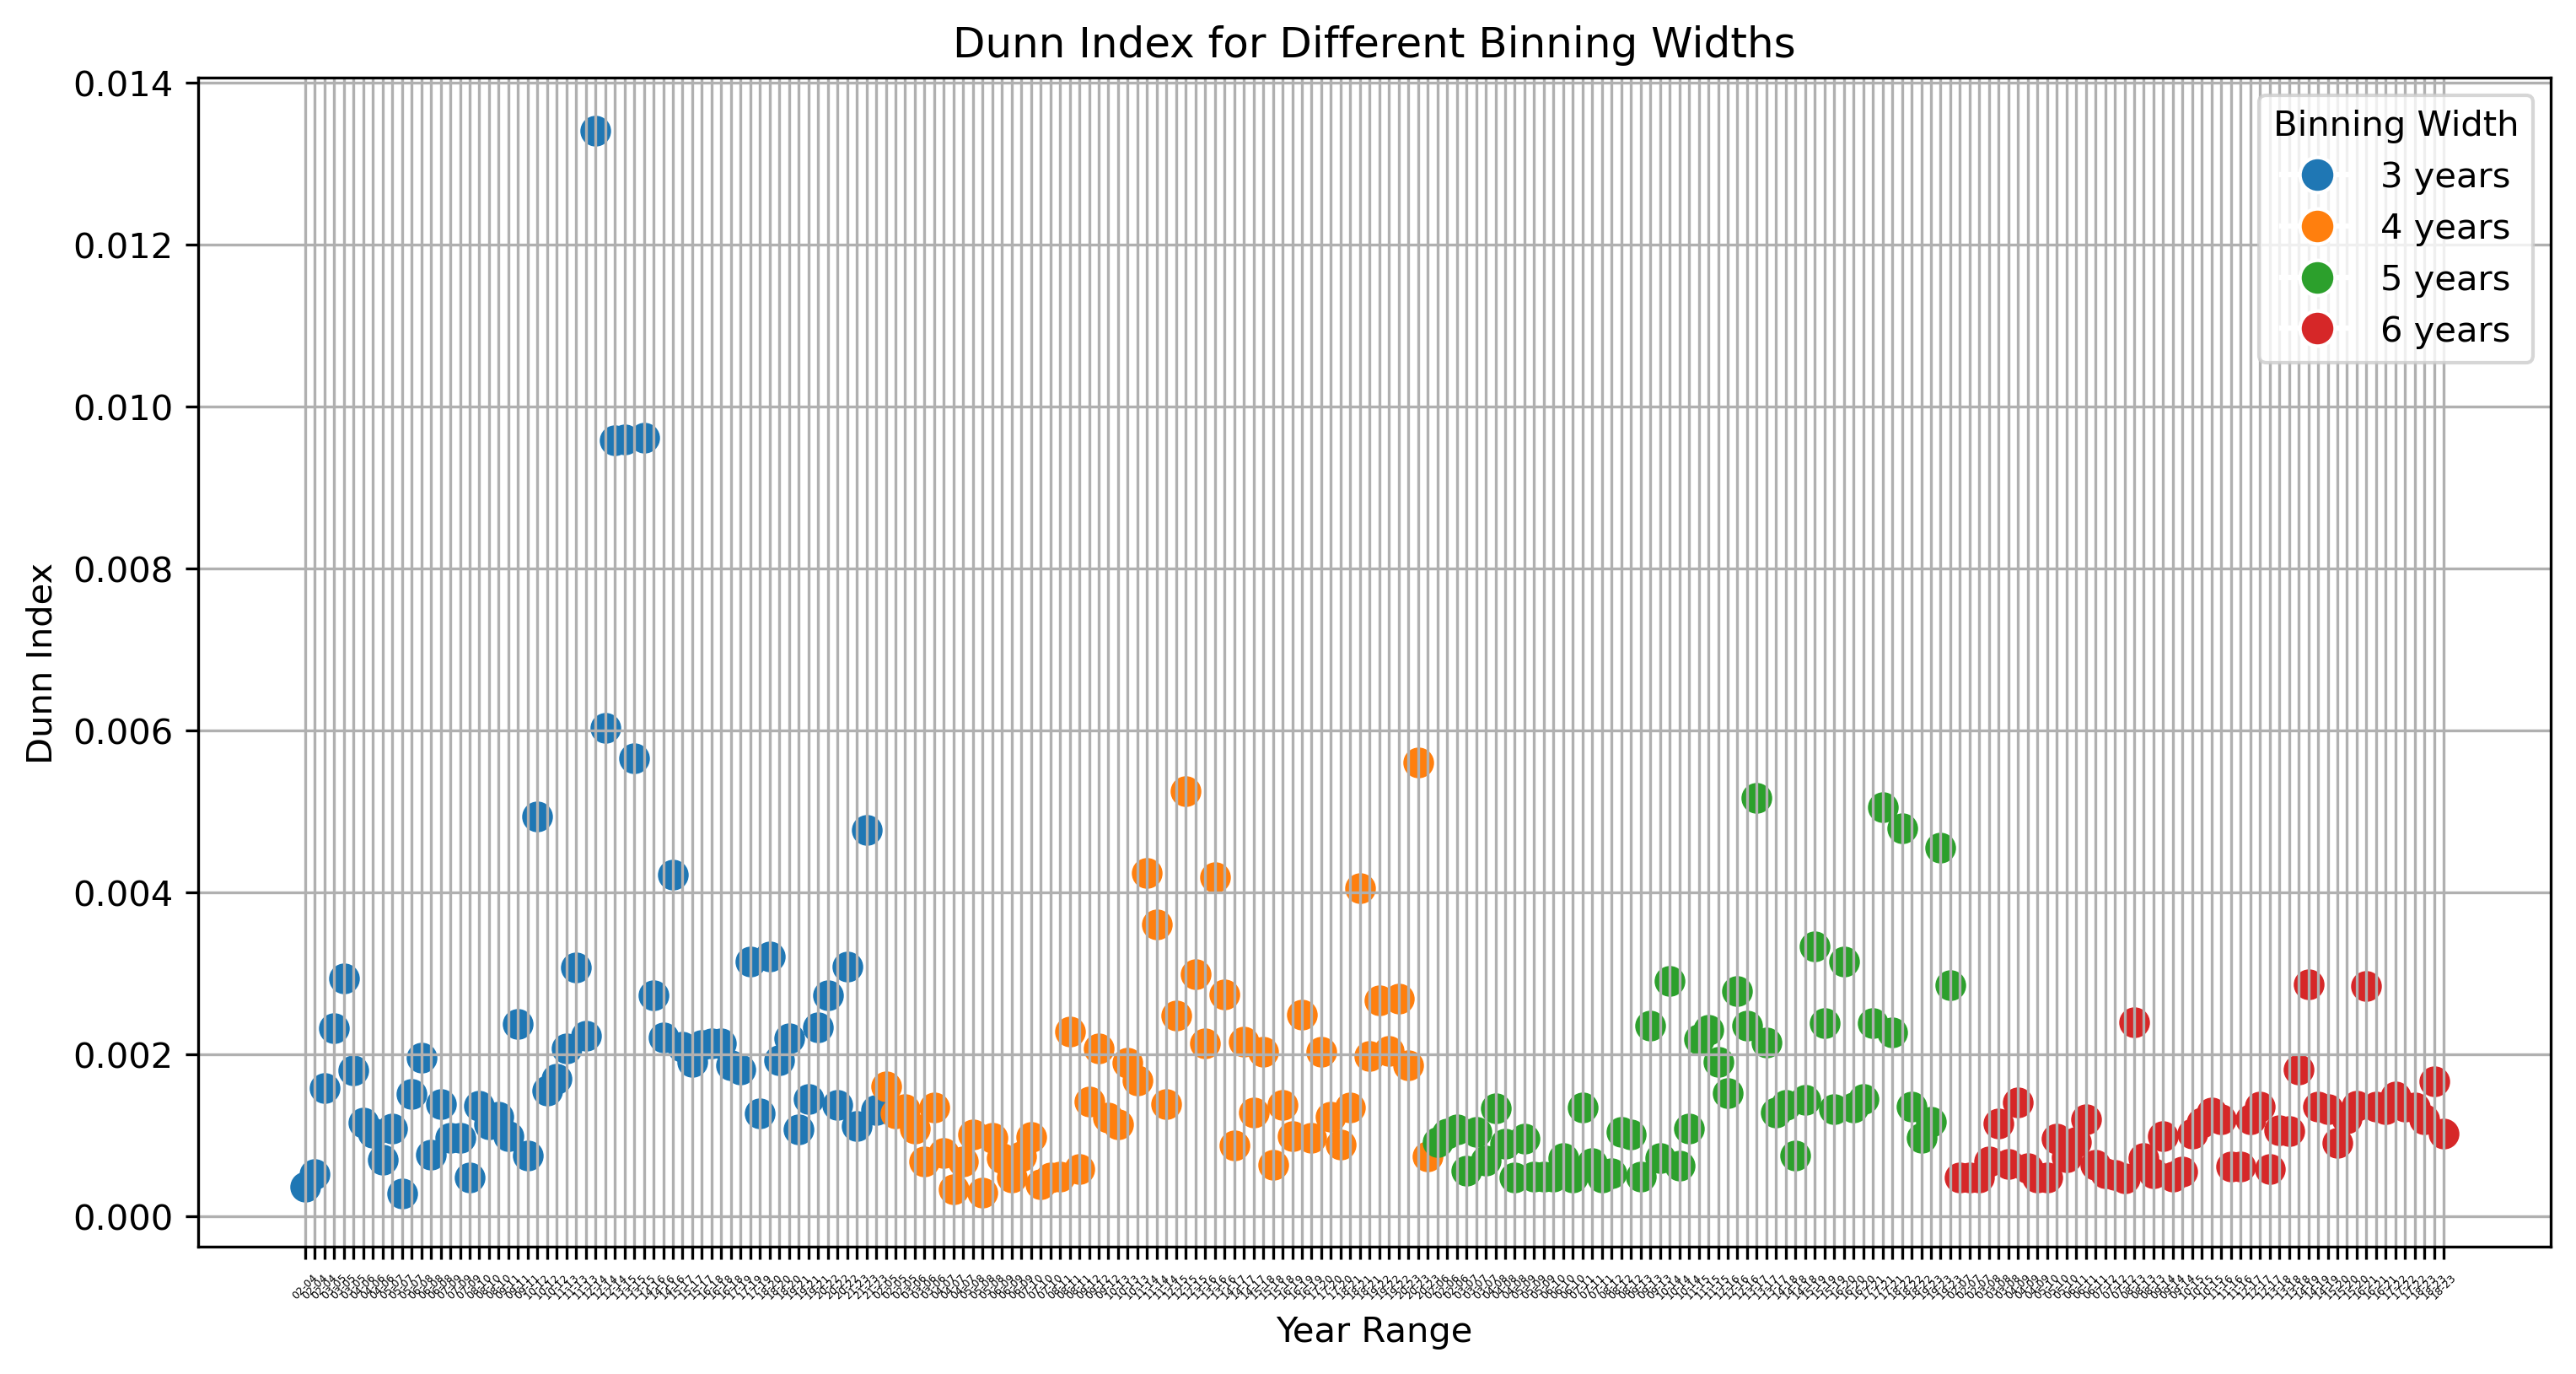

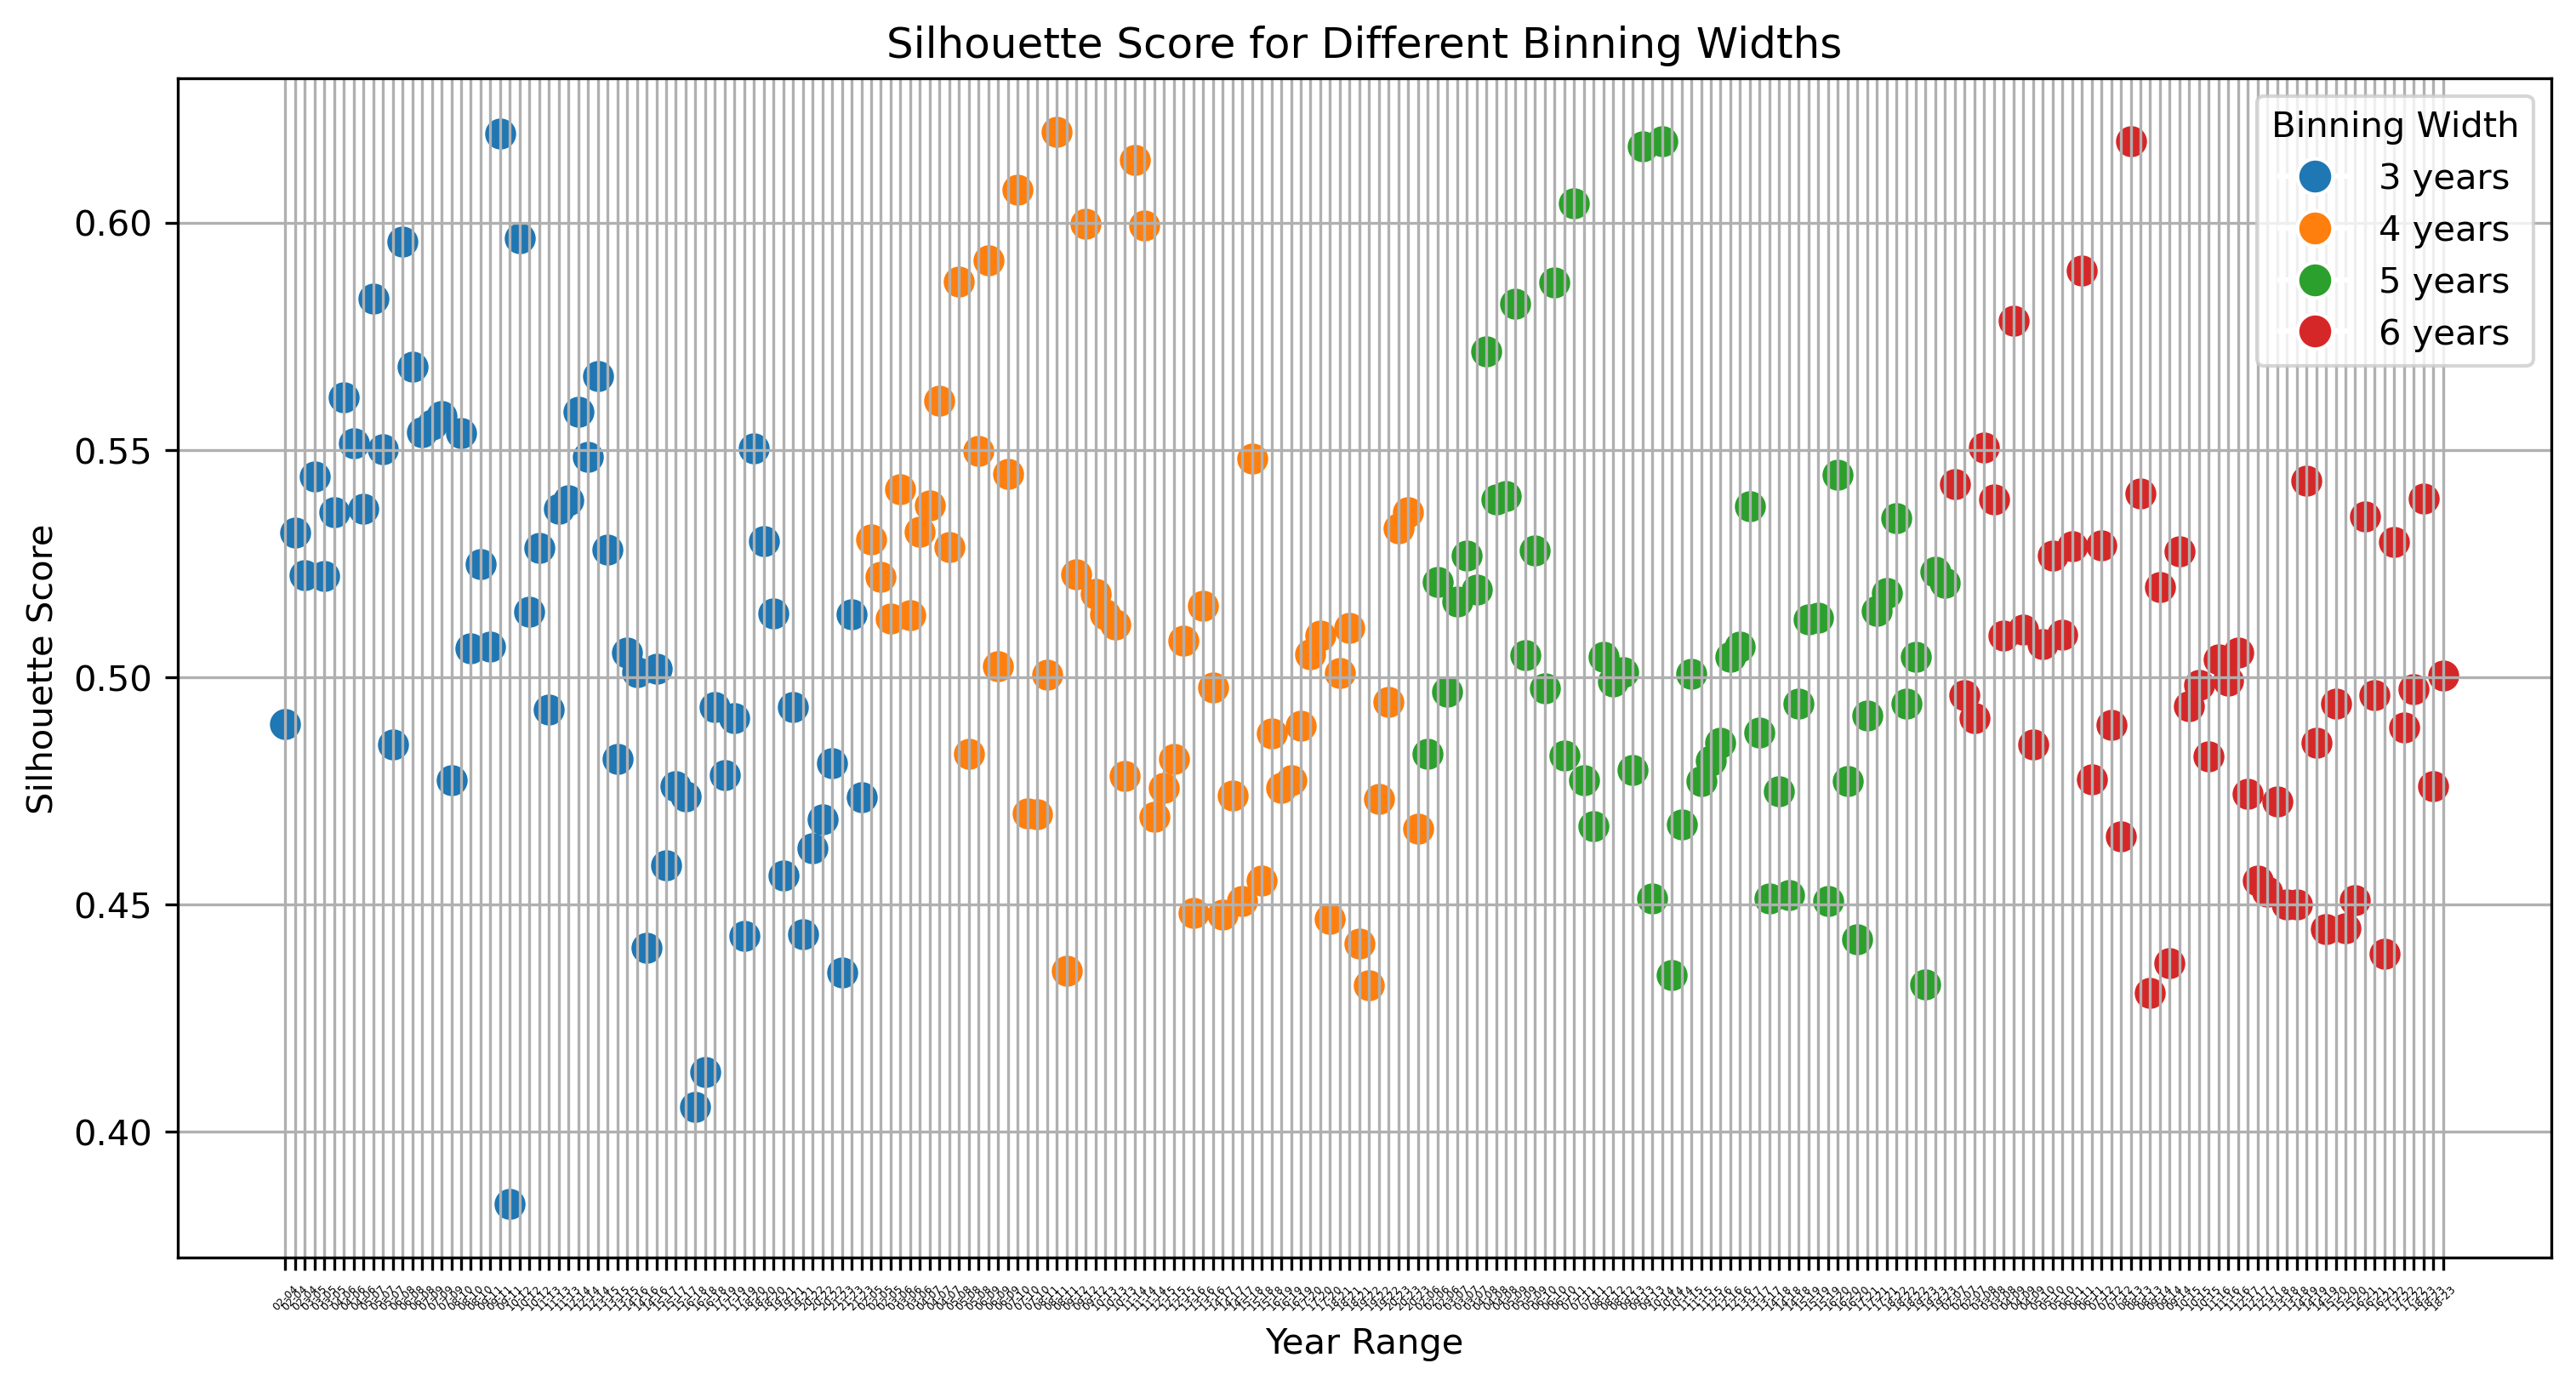

In [6]:
import os
from IPython.display import display, Image
display(Image(filename=os.path.join('Images', 'binning_width_kmeans_and_images','calinski-harabasz_binnings.png')))
display(Image(filename=os.path.join("Images/binning_width_kmeans_and_images/davies-bouldin_binnings.png")))
display(Image(filename=os.path.join("Images/binning_width_kmeans_and_images/dunn_index_binnings.png")))
display(Image(filename=os.path.join("Images/binning_width_kmeans_and_images/silhouette_score_binnings.png")))

## Different binning widths DBSCAN

In [2]:
import cluster_data
from cluster_data import run_clustering, normalize_data, unnormalize, generate_running_year_ranges, bin_data_for_clustering
import numpy as np
import pandas as pd
import os
from DBSCAN import dbscan_clustering
from cluster_plotter import ClusterPlotter
from clustering_utils import ClusterData
import cluster_plotter
import scores

array_of_metrics = []
array_of_yearranges = []
array_of_binwidths = []

bins = [3, 4, 5, 6]
eps_vals = [0.01]
min_samples_vals = [15]

# Output directory for plots
plot_dir = "Images/binning_width_dbscan_and_images"
os.makedirs(plot_dir, exist_ok=True)
cluster_plotter.clear_directory(plot_dir)

for b in bins:
    running_ranges = generate_running_year_ranges(2002, 2023, b)
    binned_data = bin_data_for_clustering(running_ranges, print_res=False)

    for cluster_data, year_range in binned_data:
        print(f"\nRunning DBSCAN for Year Range: {year_range}")

        data_array = np.array([cluster_data.inc, cluster_data.raan]).T
        normalized_data, data_min, data_max = normalize_data(data_array)

        for eps in eps_vals: 
            for min_samples in min_samples_vals:
                result_dbscan, time_dbscan, n_clusters_dbscan, points_per_cluster_dbscan, metrics_dbscan = run_clustering(
                    dbscan_clustering,
                    f"DBSCAN, eps: {eps}, min_samples: {min_samples}",
                    normalized_data,
                    data_min,
                    data_max,
                    eps = eps,
                    min_samples = min_samples,
                    plot=False,
                )

                # Pad metrics if needed (for plotting later)
                if len(metrics_dbscan) < 4:
                    metrics_dbscan = metrics_dbscan + [None] * (4 - len(metrics_dbscan))

                array_of_metrics.append(metrics_dbscan)
                array_of_yearranges.append(year_range)
                array_of_binwidths.append(b)

                unnormalized_data, cluster_centers = unnormalize(result_dbscan.data, result_dbscan.cluster_centers, data_min, data_max)
                plotter = ClusterPlotter(unnormalized_data, result_dbscan.labels, cluster_centers)
                plotter.clusters_2d_plot(f"DBSCAN: years = {year_range}, eps = {eps}, min_samples = {min_samples}", os.path.join(plot_dir, f"dbscan_{year_range}_eps{eps}_minsamples{min_samples}.png"))

dir = plot_dir
scores.plot_scores_for_different_binnings(array_of_metrics, array_of_yearranges, array_of_binwidths, dir)


Running DBSCAN for Year Range: 2002-2004
Runtime for dbscan_clustering: 0.188499 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images/binning_width_dbscan_and_images\dbscan_2002-2004_eps0.01_minsamples15.png

Running DBSCAN for Year Range: 2003-2005
Runtime for dbscan_clustering: 0.223782 seconds
Plot saved as: Images/binning_width_dbscan_and_images\dbscan_2003-2005_eps0.01_minsamples15.png

Running DBSCAN for Year Range: 2004-2006
Runtime for dbscan_clustering: 0.538414 seconds
Plot saved as: Images/binning_width_dbscan_and_images\dbscan_2004-2006_eps0.01_minsamples15.png

Running DBSCAN for Year Range: 2005-2007
Runtime for dbscan_clustering: 0.283728 seconds
Plot saved as: Images/binning_width_dbscan_and_images\dbscan_2005-2007_eps0.01_minsamples15.png

Running DBSCAN for Year Range: 2006-2008
Runtime for dbscan_clustering: 0.431496 seconds
Plot saved as: Images/binning_width_dbscan_and_images\dbscan_2006-2008_eps0.01_minsamples15.png

Running DBSCAN for Year Range: 2007-2009
Runtime for dbscan_clustering: 0.356497 seconds
Plot saved as: Images/binning_width_dbscan_and_images\dbscan_2007-2009

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images/binning_width_dbscan_and_images\dbscan_2002-2005_eps0.01_minsamples15.png

Running DBSCAN for Year Range: 2003-2006
Runtime for dbscan_clustering: 0.334733 seconds
Plot saved as: Images/binning_width_dbscan_and_images\dbscan_2003-2006_eps0.01_minsamples15.png

Running DBSCAN for Year Range: 2004-2007
Runtime for dbscan_clustering: 0.544835 seconds
Plot saved as: Images/binning_width_dbscan_and_images\dbscan_2004-2007_eps0.01_minsamples15.png

Running DBSCAN for Year Range: 2005-2008
Runtime for dbscan_clustering: 0.436260 seconds
Plot saved as: Images/binning_width_dbscan_and_images\dbscan_2005-2008_eps0.01_minsamples15.png

Running DBSCAN for Year Range: 2006-2009
Runtime for dbscan_clustering: 0.491294 seconds
Plot saved as: Images/binning_width_dbscan_and_images\dbscan_2006-2009_eps0.01_minsamples15.png

Running DBSCAN for Year Range: 2007-2010
Runtime for dbscan_clustering: 0.327982 seconds
Plot saved as: Images/binning_width_dbscan_and_images\dbscan_2007-2010

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images/binning_width_dbscan_and_images\dbscan_2019-2023_eps0.01_minsamples15.png

Running DBSCAN for Year Range: 2002-2007
Runtime for dbscan_clustering: 0.636968 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images/binning_width_dbscan_and_images\dbscan_2002-2007_eps0.01_minsamples15.png

Running DBSCAN for Year Range: 2003-2008
Runtime for dbscan_clustering: 0.557849 seconds
Plot saved as: Images/binning_width_dbscan_and_images\dbscan_2003-2008_eps0.01_minsamples15.png

Running DBSCAN for Year Range: 2004-2009
Runtime for dbscan_clustering: 0.584249 seconds
Plot saved as: Images/binning_width_dbscan_and_images\dbscan_2004-2009_eps0.01_minsamples15.png

Running DBSCAN for Year Range: 2005-2010
Runtime for dbscan_clustering: 0.449295 seconds
Plot saved as: Images/binning_width_dbscan_and_images\dbscan_2005-2010_eps0.01_minsamples15.png

Running DBSCAN for Year Range: 2006-2011
Runtime for dbscan_clustering: 0.347651 seconds
Plot saved as: Images/binning_width_dbscan_and_images\dbscan_2006-2011_eps0.01_minsamples15.png

Running DBSCAN for Year Range: 2007-2012
Runtime for dbscan_clustering: 0.249959 seconds
Plot saved as: Images/binning_width_dbscan_and_images\dbscan_2007-2012

c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images/binning_width_dbscan_and_images\dbscan_2017-2022_eps0.01_minsamples15.png

Running DBSCAN for Year Range: 2018-2023
Runtime for dbscan_clustering: 0.123047 seconds


c:\Users\fionu\OneDrive\Dokumente\Daten Fiona\AIUB\Code\AIUB-Backup\clustering\scores.py:180: RuntimeWarning: invalid value encountered in sqrt
  stds[label] = tuple(np.sqrt(eigenvalues))


Plot saved as: Images/binning_width_dbscan_and_images\dbscan_2018-2023_eps0.01_minsamples15.png

 Colored comparison plots saved in: Images/binning_width_dbscan_and_images


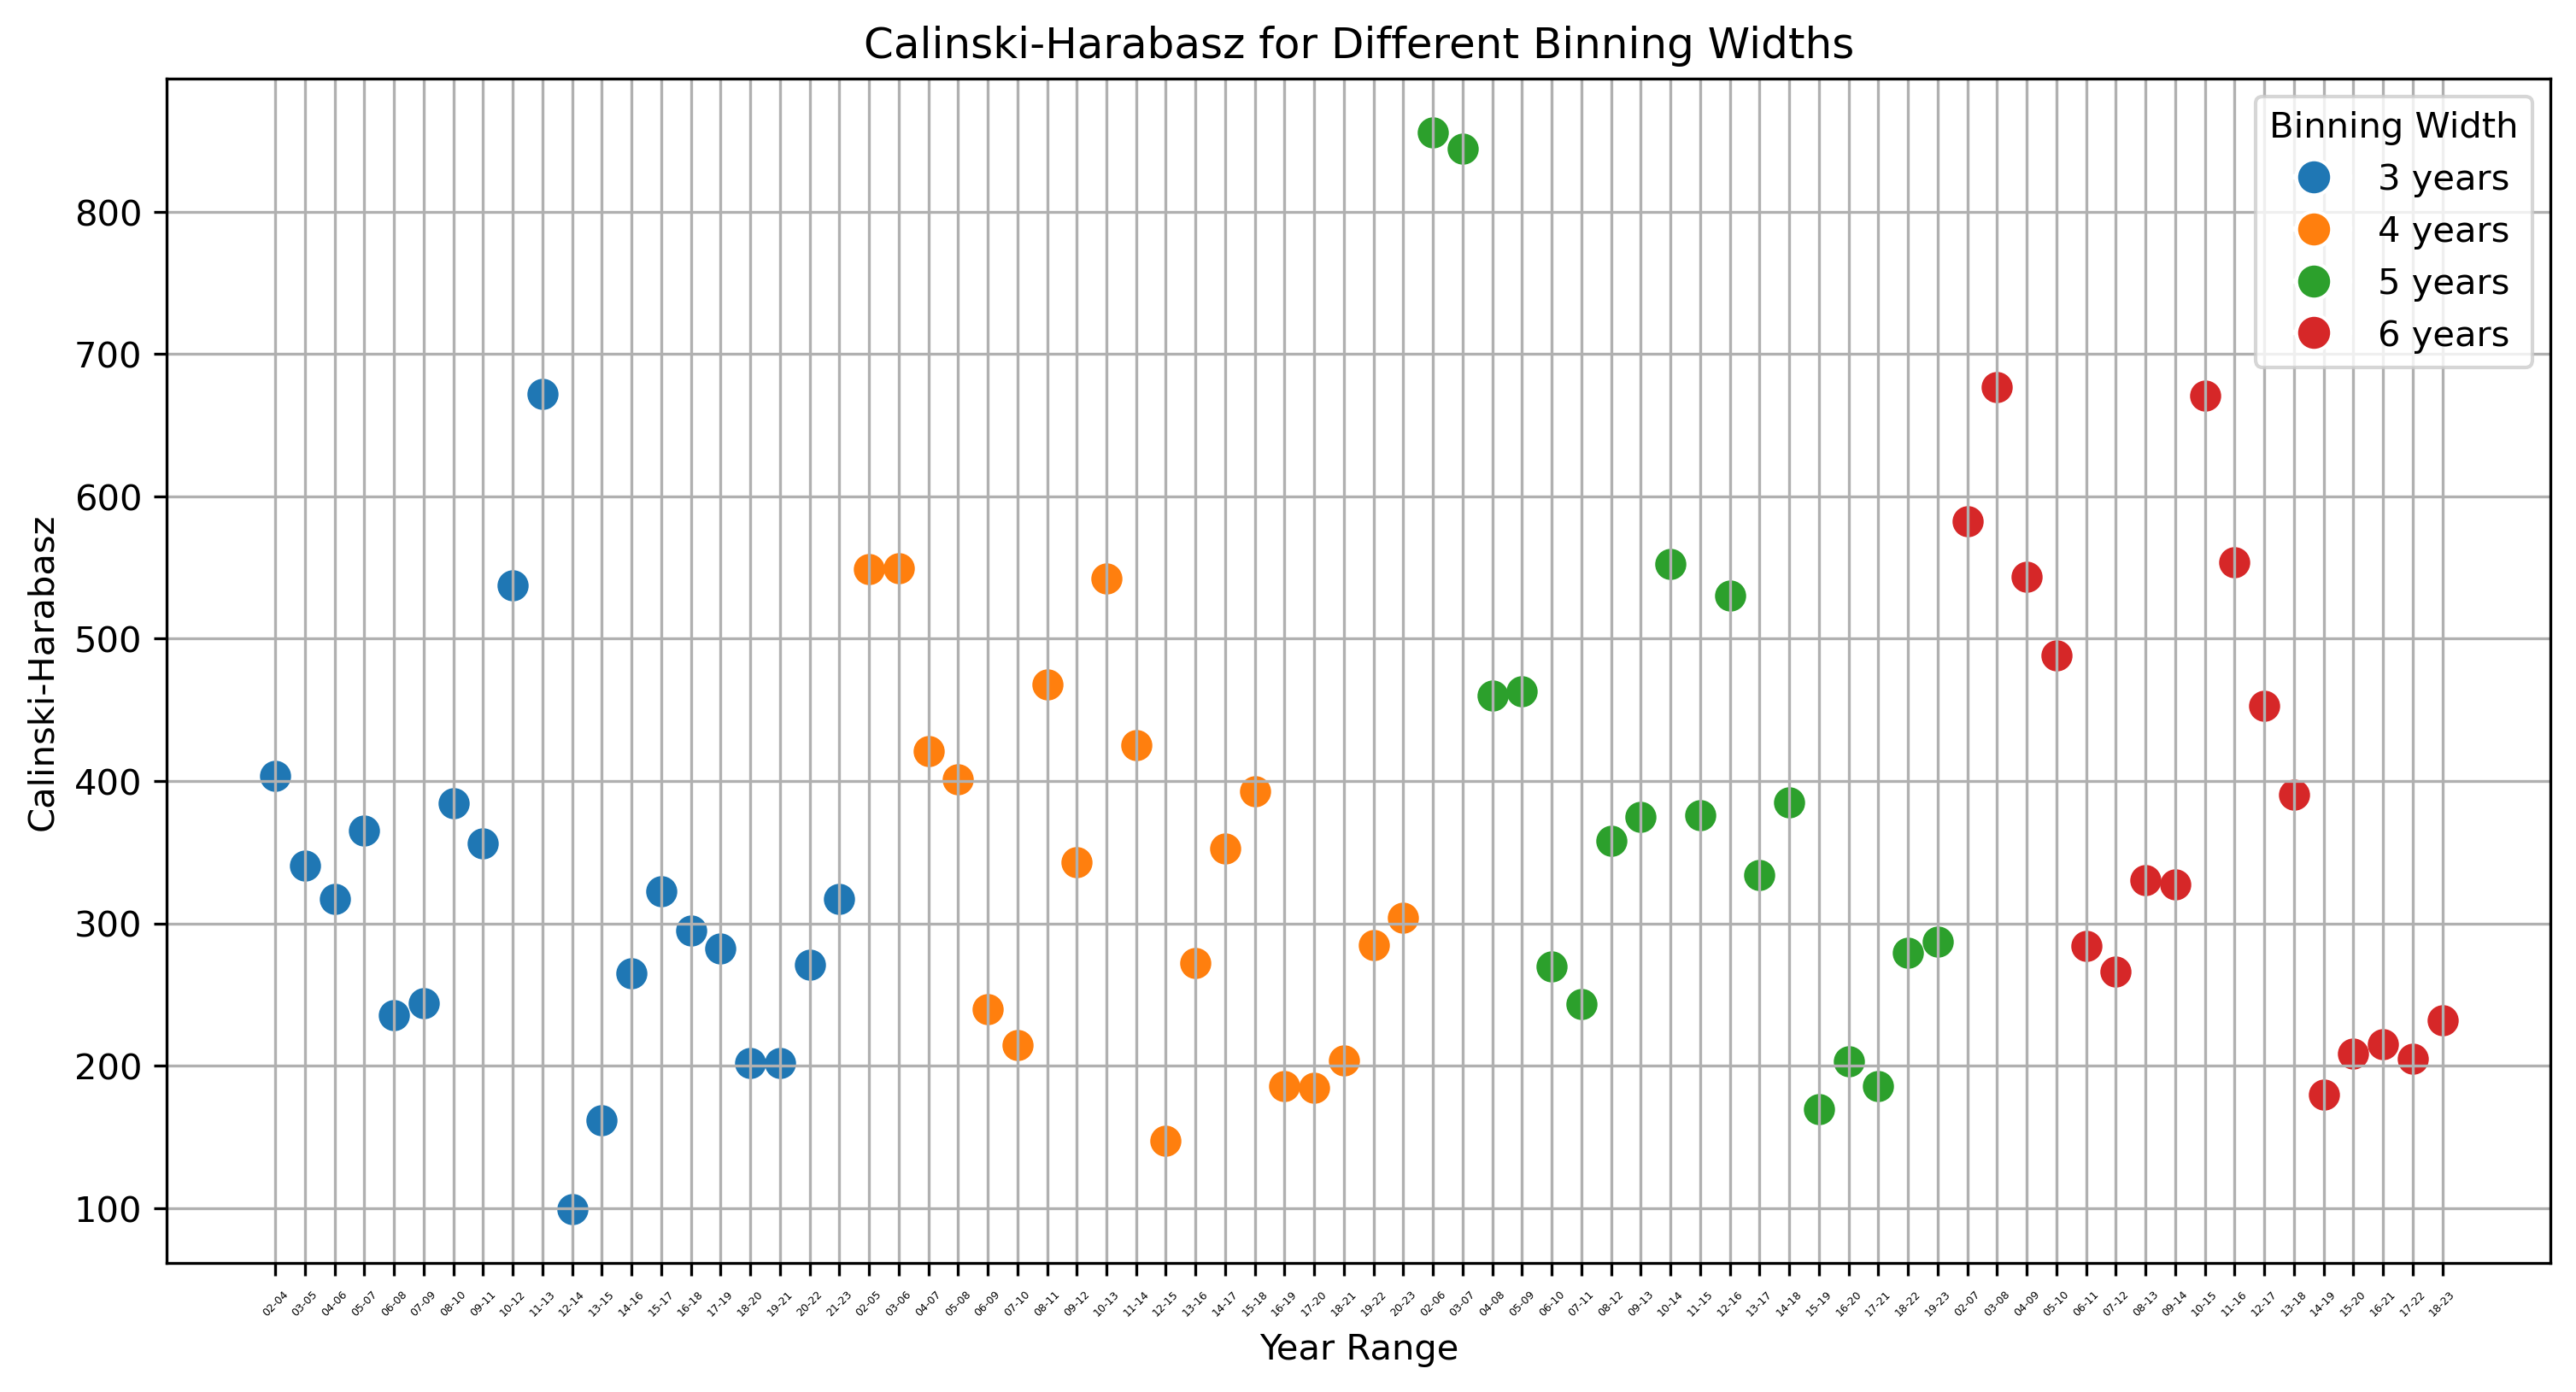

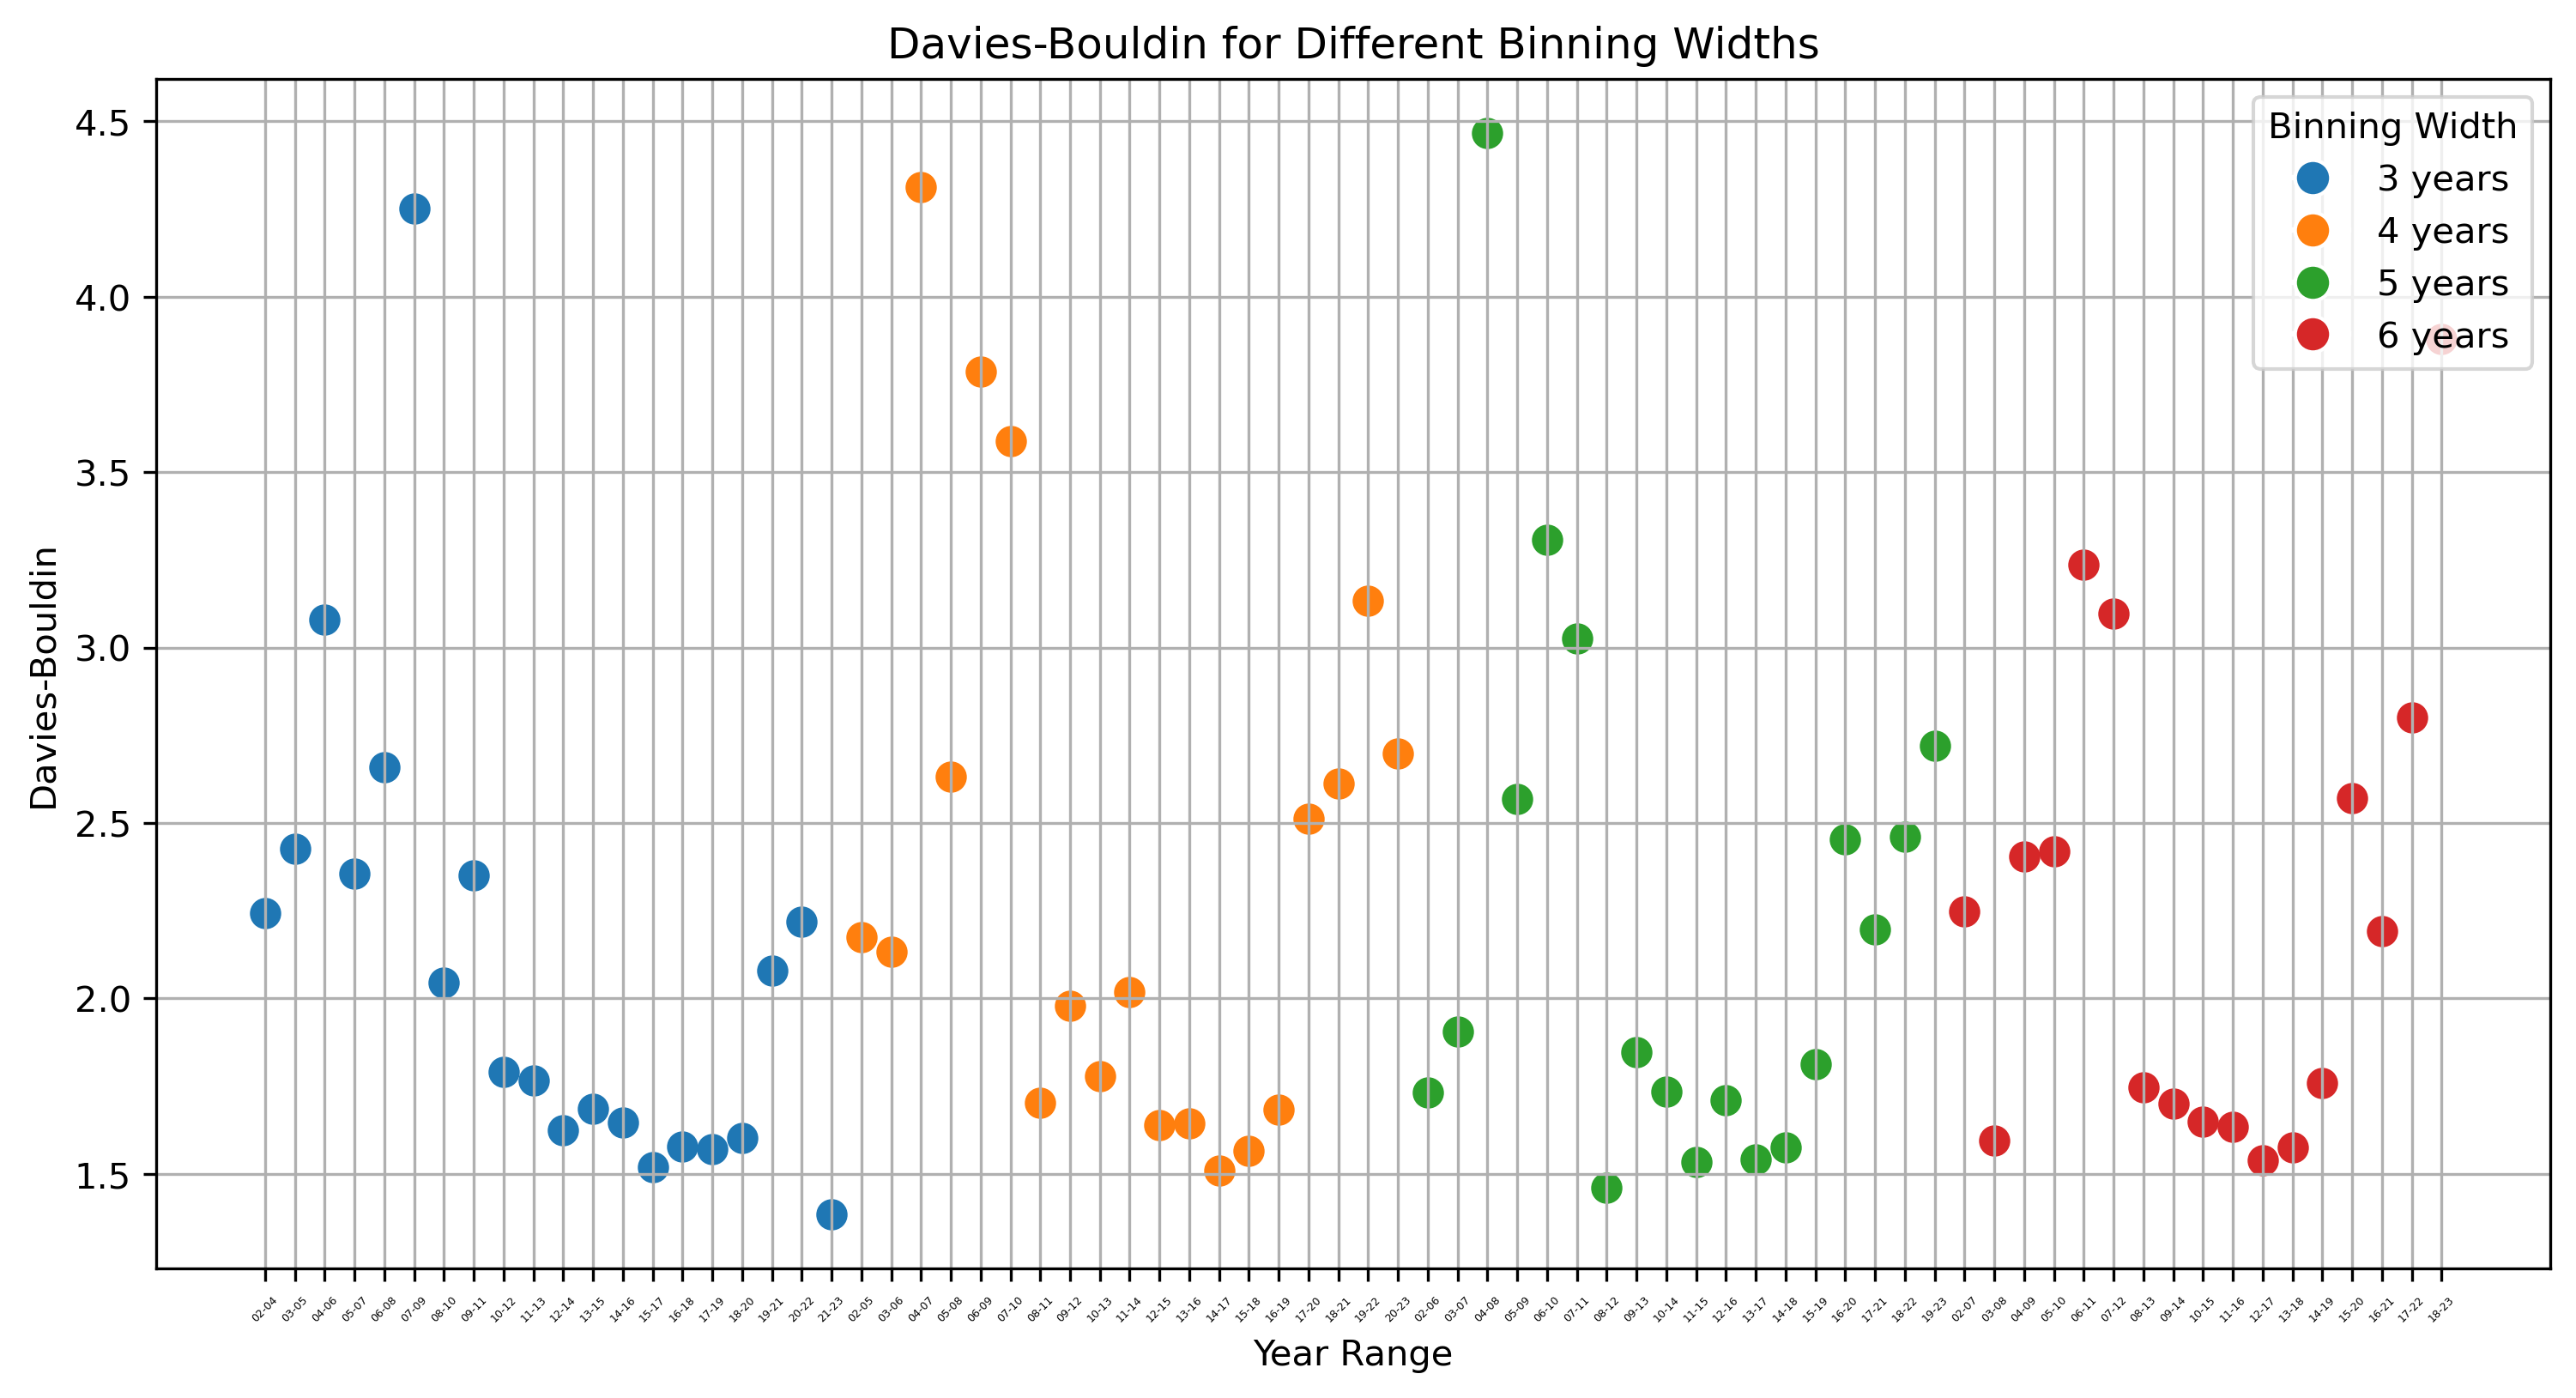

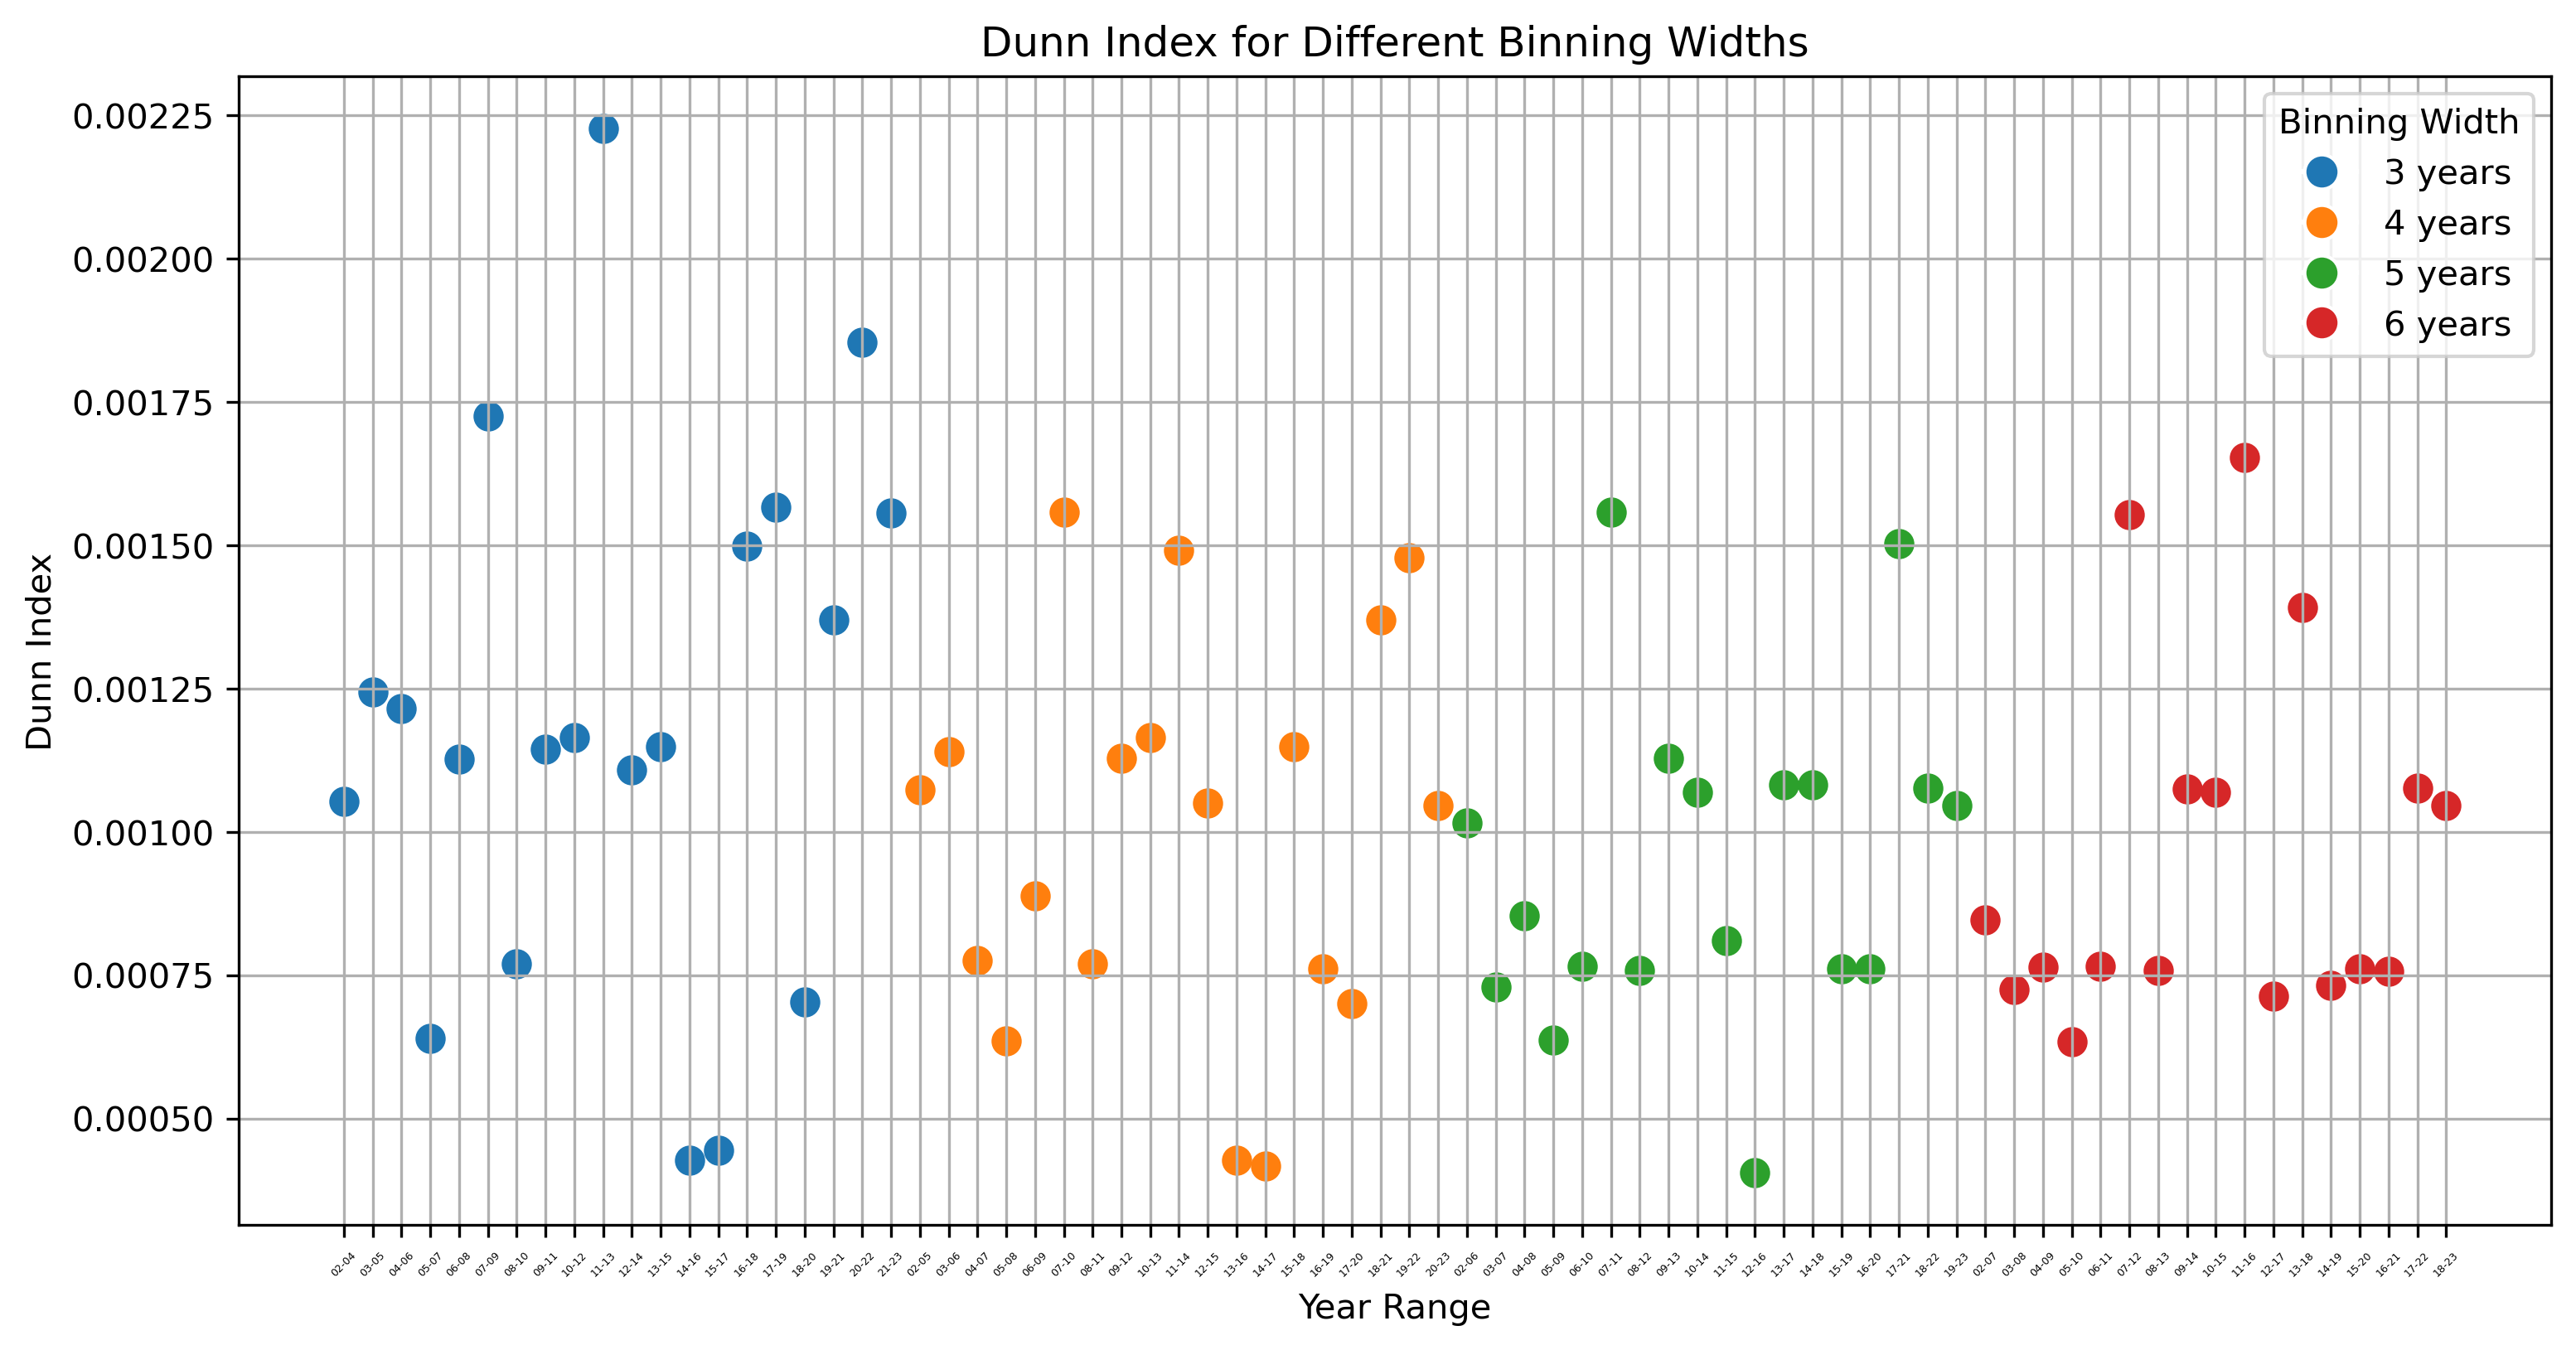

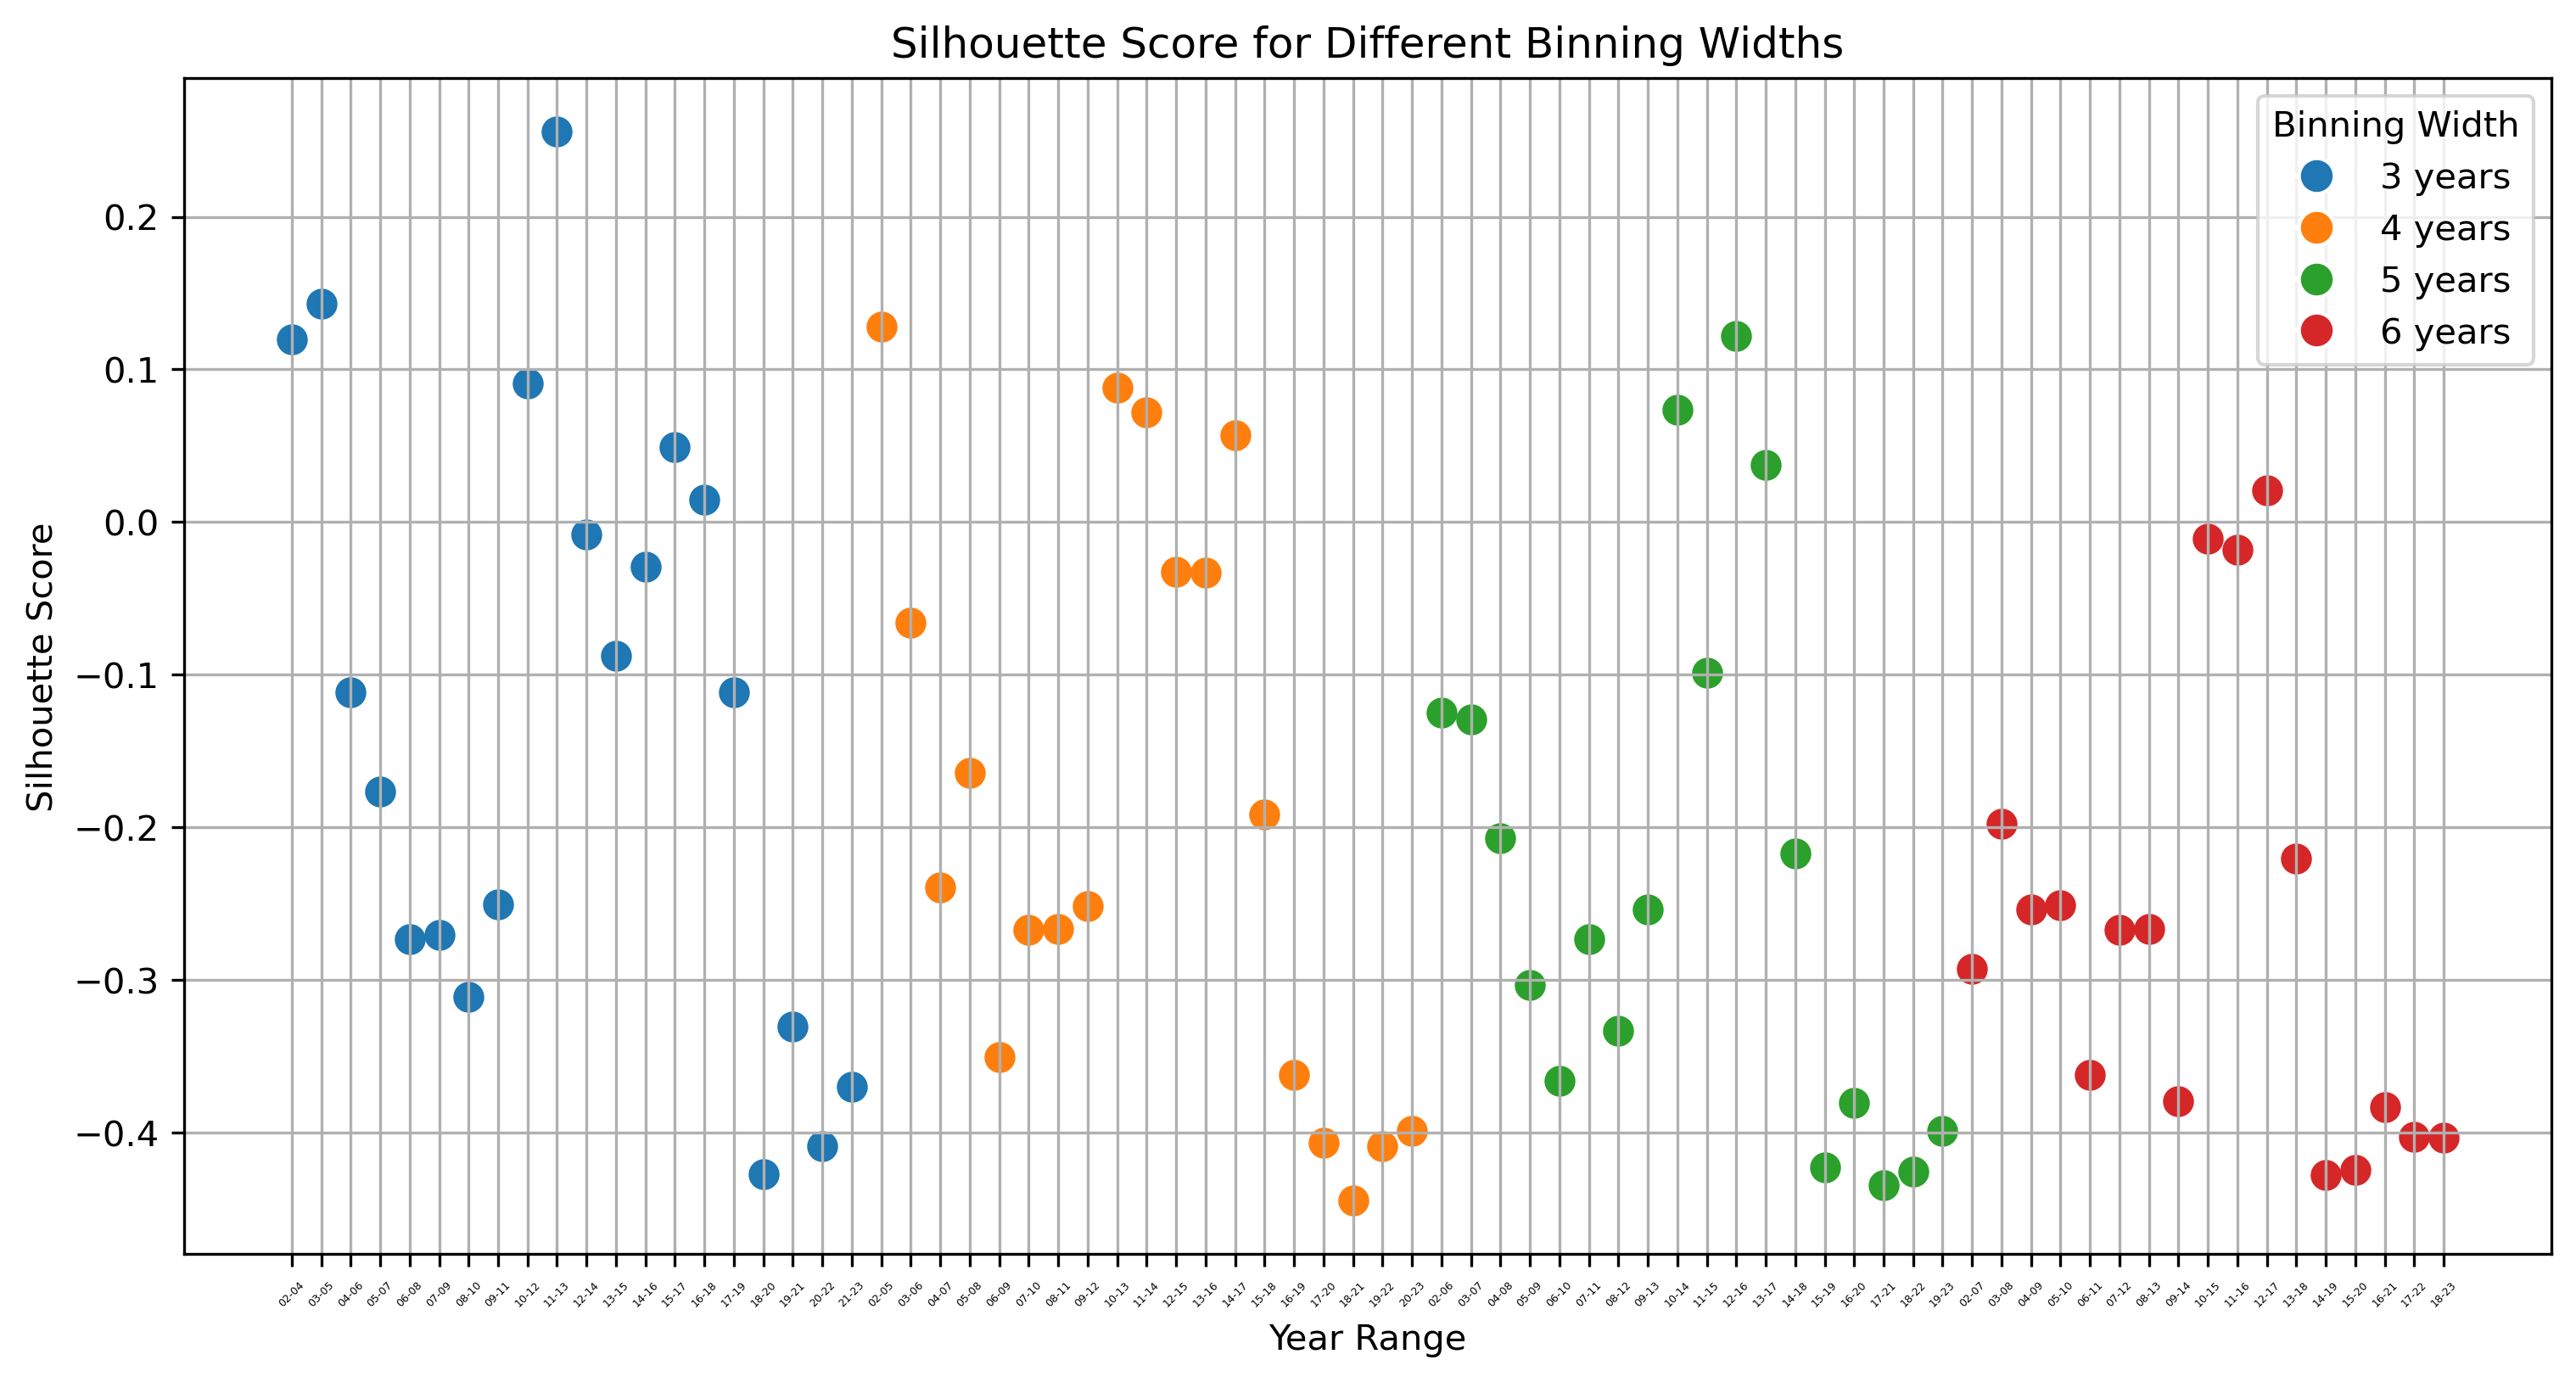

In [7]:
import os
from IPython.display import display, Image
display(Image(filename=os.path.join('Images', 'binning_width_dbscan_and_images','calinski-harabasz_binnings.png')))
display(Image(filename=os.path.join("Images/binning_width_dbscan_and_images/davies-bouldin_binnings.png")))
display(Image(filename=os.path.join("Images/binning_width_dbscan_and_images/dunn_index_binnings.png")))
display(Image(filename=os.path.join("Images/binning_width_dbscan_and_images/silhouette_score_binnings.png")))